# Analysis de origen de los datos de imagen
Se comprueba y compara el rendimiento de un modelo convertido a TensorFlow Lite en función del tipo de optimización
aplicada.
## Imports

In [1]:
from image_model_evaluation import tensorflow_lite_model_evaluation

## Parámetros
Parámetros del análisis que se efectuará.

In [2]:
project_dir = "/home/daniel/PycharmProjects/tfg-tinyml"
saved_models_dir = f"{project_dir}/saved models/image"
micro_data_test_dir = f"{project_dir}/samples/microcontroller/preprocessed image/test"
non_quantized_model_path = f"{saved_models_dir}/tensorflow lite/MicroImgDataModel.tflite"
quantized_model_path = f"{saved_models_dir}/tensorflow lite/MicroImgDataModelQuant.tflite"
qat_model_path = f"{saved_models_dir}/tensorflow lite/MicroImgDataModelQAT.tflite"
label_index_dir = f"{saved_models_dir}/label index mappings"
label_index_path = f"{label_index_dir}/MicroImgDataModel.joblib"

## Modelo sin cuantizar
Comprobamos el rendimiento del modelo sin cuantizar sobre los datos de la partición test de datos captados con
microcontrolador.

Testing model located in "/home/daniel/PycharmProjects/tfg-tinyml/saved models/image/tensorflow lite/MicroImgDataModel.tflite".
Model size 131.6796875 Kb
Testing model with files located in "/home/daniel/PycharmProjects/tfg-tinyml/samples/microcontroller/preprocessed image/test".
Testing 24 images from class face.
Testing 24 images from class mask.
Testing 21 images from class nothing.


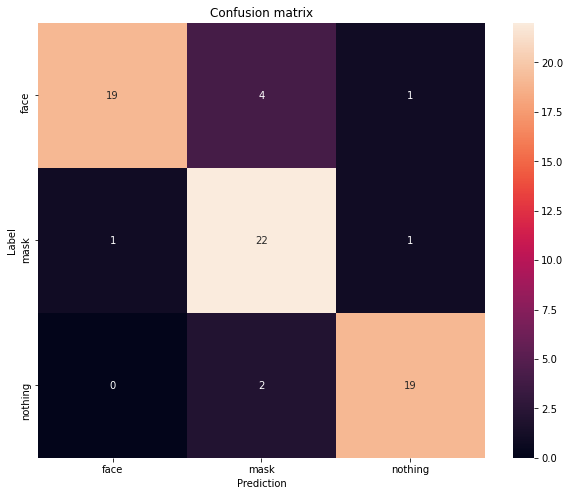

              precision    recall  f1-score   support

        face    0.95000   0.79167   0.86364        24
        mask    0.78571   0.91667   0.84615        24
     nothing    0.90476   0.90476   0.90476        21

    accuracy                        0.86957        69
   macro avg    0.88016   0.87103   0.87152        69
weighted avg    0.87909   0.86957   0.87007        69

Average time: 0.9684355362601902 ms
Max time: 1.7063617706298828 ms
Min time: 0.782012939453125 ms


In [3]:
tensorflow_lite_model_evaluation(non_quantized_model_path, label_index_path, [micro_data_test_dir])

## Modelo cuantizado
Comprobamos el rendimiento del modelo cuantizado sobre los datos de la partición test de datos captados con
microcontrolador.

Testing model located in "/home/daniel/PycharmProjects/tfg-tinyml/saved models/image/tensorflow lite/MicroImgDataModelQuant.tflite".
Model size 45.9140625 Kb
Testing model with files located in "/home/daniel/PycharmProjects/tfg-tinyml/samples/microcontroller/preprocessed image/test".
Testing 24 images from class face.
Testing 24 images from class mask.
Testing 21 images from class nothing.


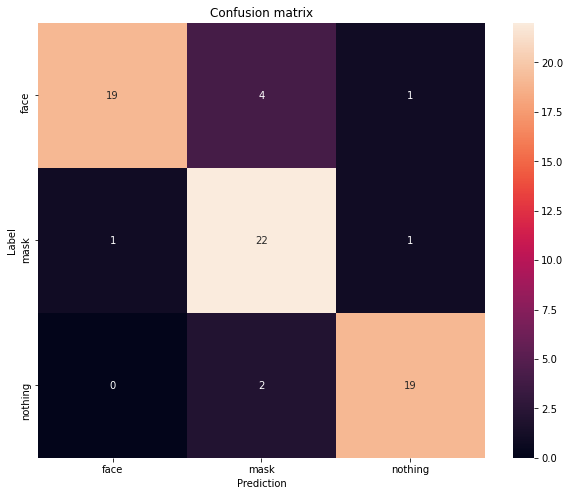

              precision    recall  f1-score   support

        face    0.95000   0.79167   0.86364        24
        mask    0.78571   0.91667   0.84615        24
     nothing    0.90476   0.90476   0.90476        21

    accuracy                        0.86957        69
   macro avg    0.88016   0.87103   0.87152        69
weighted avg    0.87909   0.86957   0.87007        69

Average time: 9.903627893199092 ms
Max time: 34.24334526062012 ms
Min time: 8.764266967773438 ms
Quantized models can perform slower as they are intended to work on ARM devices.


In [4]:
tensorflow_lite_model_evaluation(quantized_model_path, label_index_path, [micro_data_test_dir], quantized=True)

## Modelo QAT
Comprobamos el rendimiento del modelo cuantizado durante el entrenamiento sobre los datos de la partición test de datos
captados con microcontrolador.

Testing model located in "/home/daniel/PycharmProjects/tfg-tinyml/saved models/image/tensorflow lite/MicroImgDataModelQAT.tflite".
Model size 46.03125 Kb
Testing model with files located in "/home/daniel/PycharmProjects/tfg-tinyml/samples/microcontroller/preprocessed image/test".
Testing 24 images from class face.
Testing 24 images from class mask.
Testing 21 images from class nothing.


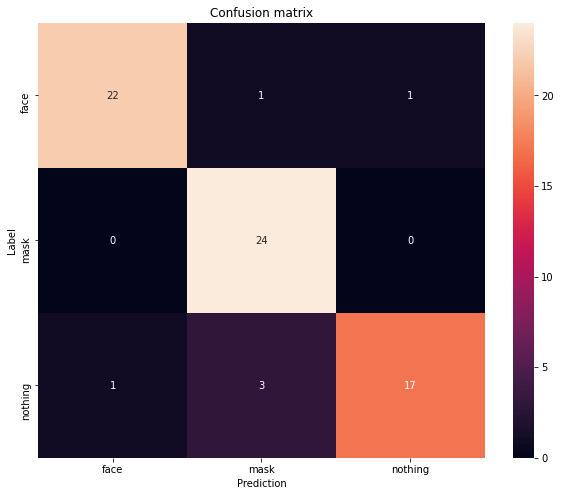

              precision    recall  f1-score   support

        face    0.95652   0.91667   0.93617        24
        mask    0.85714   1.00000   0.92308        24
     nothing    0.94444   0.80952   0.87179        21

    accuracy                        0.91304        69
   macro avg    0.91937   0.90873   0.91035        69
weighted avg    0.91828   0.91304   0.91202        69

Average time: 9.17919131292813 ms
Max time: 10.998010635375977 ms
Min time: 8.631706237792969 ms
Quantized models can perform slower as they are intended to work on ARM devices.


In [5]:
tensorflow_lite_model_evaluation(qat_model_path, label_index_path, [micro_data_test_dir], quantized=True)